# DS 3000 HW 4

Due: Tuesday Nov 21 @ 11:59 PM EST

### Submission Instructions
You will may submit up to two files for this assignment. This `ipynb` file should have answers to the programming questions, and you could include the answers to the math problems as well either via LaTeX typesetting in Markdown cells, or by embedding images of your written work. If you would rather work on the math problems separately, you may also submit a pdf file with your handwritten answers to the math problems. To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to Gradescope.

### Tips for success
- Start early
- Make use of Piazza (also accessible through Canvas)
- Make use of Office Hours
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (*not* show each other your answers to) the problems.

# Part 1: Computation by Hand

For each of the sub-parts below, you must show all math work/steps (no matter how trivial) to receive full credit. You may either use LaTeX typesetting within a Markdown cell, or do it by hand with pen and paper and embed the image in this .ipynb file, or submit a separate pdf file with your handwritten work. Round all decimals to three places. name:

## Part 1.1: Matrix Multiplication (5 points)

Using the below matrices, perform the following operations by hand, **then** perform the same operations in your notebook using `numpy`. If an operation cannot be done, still write the code but then comment it out before running and submitting your final .ipynb file.

$$A = \begin{bmatrix}
-3 & 8 \\
0 & 5
\end{bmatrix}$$

$$B = \begin{bmatrix}
2 & -7 \\
6 & -1 \\
-9 & 4 \end{bmatrix}$$

$$C = \begin{bmatrix}
-6 & 0 & 5 \\
1 & 3 & -2 \\
7 & -5 & -8 \\
4 & 9 & -10
\end{bmatrix}$$

$$D = \begin{bmatrix}
-4 & 0 & 3 \\
8 & -2 & 5 \\
6 & -3 & 1
\end{bmatrix}$$

$$e = \begin{bmatrix}
7 \\
-8 \\
10 \\
-1
\end{bmatrix}$$

- $AB^T$
- $CD$
- $DB$
- $Ce$
- $e^TC$

In [2]:
import numpy as np

In [13]:
a = np.array([[-3, 8],
             [0, 5]])
b = np.array([[2, -7],
             [6, -1],
             [-9, 4]])
c = np.array([[-6, 0, 5],
             [1, 3, -2],
             [7, -5, -8],
             [4, 9, -10]])
d = np.array([[-4, 0, 3],
              [8, -2, 5],
              [6, -3, 1]])
e = np.array([[7],
              [-8],
              [10],
              [-1]])

In [80]:
np.matmul(a, b.T)

array([[-62, -26,  59],
       [-35,  -5,  20]])

In [81]:
np.matmul(c, d)

array([[  54,  -15,  -13],
       [   8,    0,   16],
       [-116,   34,  -12],
       [  -4,   12,   47]])

In [89]:
np.matmul(d, b)

array([[-35,  40],
       [-41, -34],
       [-15, -35]])

In [84]:
# np.matmul(c, e)

In [17]:
np.matmul(e.T, c)

array([[ 16, -83, -19]])

## Part 1.2: Spans, Linear In/Dependence, Orthogonality (5 points)

Based on the following three vectors, answer the ensuing questions, making sure to write out all supporting work with by hand or in a markdown cell. You may use `numpy` to help you check some of your answers, if you wish, but all work must be done by hand and provided for full credit.

$$a = \begin{bmatrix} 8 \\ -2 \end{bmatrix}$$
$$b = \begin{bmatrix} 1 \\ 4 \end{bmatrix}$$
$$c = \begin{bmatrix} -3 \\ .75 \end{bmatrix}$$

- What is the span of $a$ and $b$?
- What is the span of $a$ and $c$?
- Are the vectors $a$ and $b$ linearly independent or dependent?
- Is the set of all three vectors linearly independent or dependent?
- Which vectors are orthogonal to each other?

## Part 1.3: Projections (5 points)

By hand, find the point in the span of $a = \begin{bmatrix} -1 \\ 3 \end{bmatrix}$ that is closest to $b = \begin{bmatrix} 0 \\ -3 \end{bmatrix}$. Make sure to show **all** work by hand, even if you use `numpy` to verify your answer. **Also, draw a rough sketch** of the operation, including it either as an embedded image in this notebook or in your separate .pdf file.

In [90]:
a = np.array([-1, 3])
b = np.array([0, -3])
c = np.dot(a, b) / np.dot(a, a)
p = c * a
p

array([ 0.9, -2.7])

## Part 1.4: Line of Best Fit (5 points)

You are interested in if there is a relationship within your friend group between how many siblings they have and how many dates they've been on. You collect the following data from five of your friends:

| siblings | dates |
|----------|-------|
| 0        | 3     |
| 2        | 9     |
| 1        | 3     |
| 0        | 2     |
| 4        | 6

Find the line of best fit, by hand, for the relationship treating number of siblings as the $x$ feature and number of dates as the $y$ feature. Be sure to include an intercept term. You may verify your answer using `numpy`, but must show all work by hand.     |

In [18]:
X = np.array([[1, 0],
              [1, 2],
              [1, 1],
              [1, 0],
              [1, 4]])
y = np.array([3, 9, 3, 2, 6])

XtXinv = np.linalg.inv(np.matmul(X.T, X))
m = np.matmul(XtXinv, np.matmul(X.T, y))
m

array([3.        , 1.14285714])

# Part 2: Writing Your Own Linear Regression Functions

In this part, you will write your own linear regression functions that can (and will) be used for both Part 3 and Part 4. You must make sure that your functions pass the assert statements in each sub-part.

## Part 2.1: Line of Best Fit Function (10 points)

Write the function `line_of_best_fit`, including well written docstring, which takes as arguments `X` (an array, either 1-d or 2-d which includes all the predictor values, not including bias term) and `y` (a 1-d array which includes all corresponding response values to `X`) and returns the vector containing the coefficients for the line of best fit, including an intercept term. I have written the `add_bias_column` function below which you will want to use within your `line_of_best_fit` function. **Make sure the assert statement written in the final code cell of this sub-part passes.**

In [2]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

In [3]:
def line_of_best_fit(x, y):
    """ finds the line of best fit for a set of data points
    
    Args:
        x (np.array): array that contains all the predictor values
        y (np.array): array of output values
    
    Returns:
        b (np.array): array containing the coefficients for the line of best fit as intercept, slope
    
    """
    x = add_bias_column(x)
    b = np.matmul(np.linalg.inv(np.matmul(x.T, x)), np.matmul(x.T, y))
    return b

In [4]:
X = np.array([0,2,1,0,4])
y = np.array([3,8,2,3,6])

assert (np.isclose(line_of_best_fit(X, y), np.array([3., 1.]))).all()

## Part 2.2: Prediction and Assessment Function (10 points)

Write the function `linreg_predict`, including well written docstring, which takes as arguments:

- `Xnew` (an array, either 1-d or 2-d which includes all the $p$ predictor features, not including bias term)
- `ynew` (a 1-d array which includes all corresponding response values to `Xnew`)
- `m` (a 1-d array of length $p+1$ which contains the coefficients from the `line_of_best_fit` function)

The function should return a dictionary containing four key-value pairs:

- `'ypreds'` (the predicted values from applying `m` to `Xnew`)
- `'resids'` (the residuals, the differences between `ynew` and `ypreds`)
- `'mse'` (the mean squared error)
- `'r2'` (the coefficient of determination ($R^2$) representing the proportion of variability in `ynew` explained by the line of best fit
  - You **do not** have to calculate this manually; you may use the `r2_score` function from `sklearn` (imported for you below)

**Note** you will want to use the `add_bias_column` again within your function before calculating all the outputs in your dictionary. **Also, make sure the assert statement written in the final code cell of this sub-part passes.**

In [5]:
from sklearn.metrics import r2_score

In [31]:
def linreg_predict(Xnew, ynew, m):
    """
    
    Args:
        Xnew (np.array): array of predictor features
        ynew (np.array): array of output values
        m (np.array): coefficients for the line of best fit
        
    Returns:
        prediction (dict): dictionary containing predicted values, residuals, 
                            mean squared error, and r2 score for the given data
    
    """
    Xnew = add_bias_column(Xnew)
    
    ypreds = np.matmul(Xnew, m)
    resids = ynew - ypreds
    mse = np.mean((ypreds - ynew) ** 2)
    r2 = r2_score(ynew, ypreds)
    
    prediction = {"ypreds": ypreds,
                 "resids": resids,
                 "mse": mse,
                 "r2": r2}
    return prediction

In [32]:
def compare_dicts(dict1, dict2):
    if dict1.keys() != dict2.keys():
        return False

    for key in dict1:
        if not np.isclose(dict1[key], dict2[key]).all():
            return False

    return True

expected_out = {'ypreds': np.array([3., 5., 4., 3., 7.]),
                'resids': np.array([0., 3., -2., 0., -1.]),
                'mse': 2.8,
                'r2': 0.4444444444444444}

X = np.array([0,2,1,0,4])
y = np.array([3,8,2,3,6])

m = line_of_best_fit(X, y)
out = linreg_predict(X, y, m)

assert compare_dicts(expected_out, out)

# Part 3: Overwatch Simple Linear Regression

For this problem you will use the `df_owl_2018.csv` file in your Homework Module on Canvas. This data set contains statistics from the 2018 Overwatch League (cleaned from [this website](https://overwatchleague.com/en-us/statslab?statslab=heroes)). You do not need to be an expert in Overwatch to complete this problem; I will provide all the context you need below. 

We are interested in a specific hero character you can play, Mercy. Mercy's primary purpose is to heal others. Sometimes when she is healing another character, that character manages to defeat an opponent. This counts as a `Defensive Assists` statistic. In this part, we will see if we can predict how many `Defensive Assists` a player achieves as Mercy given the amount of `Healing Done`, in thousands.

In [9]:
import pandas as pd

df_owl = pd.read_csv('df_owl_2018.csv')
df_owl.head()

,start_time,match_id,stage,map_type,map_name,player,team,hero,role,Ability Damage Done,...,Ultimates Used,Unscoped Accuracy,Unscoped Hits,Unscoped Shots,Venom Mine Kills,Weapon Accuracy,Weapon Kills,Whole Hog Efficiency,Whole Hog Kills,of Rockets Fired
0,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Agilities,Los Angeles Valiant,Genji,Damage,0.0,...,8,0.0,0,0,0,0.273585,0,0.0,0,0.0
1,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Genji,Damage,0.0,...,1,0.0,0,0,0,0.166667,0,0.0,0,0.0
2,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Junkrat,Damage,0.0,...,3,0.0,0,0,0,0.137500,0,0.0,0,0.0
3,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Danteh,San Francisco Shock,Tracer,Damage,0.0,...,3,0.0,0,0,0,0.327001,0,0.0,0,0.0
4,2018-01-11 00:12:00,10223,Overwatch League - Stage 1,PAYLOAD,Dorado,Envy,Los Angeles Valiant,D.Va,Tank,0.0,...,23,0.0,0,0,0,0.314785,0,0.0,0,0.0


## Part 3.1: Data Cleaning (5 points)

Before starting, we need to do two things:
1. subset the data set so that it only includes Mercy observations
    - **hint:** you should remove all `hero` values besides `Mercy`
2. divide the `Healing Done` column by `1000` so that the values are in thousands of points
    - this will assist in the interpretation of the slope
  
You do not have to, but it may help (and I recommend) to further clean the data to keep only the two columns we are interested in, `Healing Done` and `Defensive Assists`; or to simply cast those to arrays called `mercy_X` and `mercy_y` (respectively).

In [10]:
df_owl_mercy = df_owl[df_owl["hero"] == "Mercy"]

In [11]:
df_owl_mercy.loc[:, ["Healing Done"]] = df_owl_mercy.loc[:, ["Healing Done"]].apply(lambda x: x / 1000)

6       16.176682
12      20.522726
23      17.934605
34      21.049549
43      12.896022
          ...    
6083    16.010130
6090    15.442231
6104    14.930190
6111    16.864608
6129    13.459126
Name: Healing Done, Length: 595, dtype: float64

In [15]:
mercy_X = np.array(df_owl_mercy["Healing Done"])
mercy_y = np.array(df_owl_mercy["Defensive Assists"])

## Part 3.2: Cross Validate, Predict, MSE, and $R^2$ (10 points)

Use the `train_test_split` function I've imported for you below to create a single-fold (70-30 split) cross validation set (i.e. `Xtrain`, `Xtest`, `ytrain`, `ytest`) using the Mercy data you cleaned in Part 3.1. In other words, for example, the `Xtrain` set should contain a random subset of about 70\% of the `Healing Done` values.

Using your functions from Part 2, apply the `line_of_best_fit` function to the training data. Then, use the `linreg_predict` function with the test data (and the output from the first function). Print out the resulting cross validated $MSE$ and $R^2$ values and **then**, in a markdown cell, interpret $R^2$ and discuss if you think it is reasonable based on that value to predict `Defensive Assists` with `Healing Done`.

In [16]:
from sklearn.model_selection import train_test_split

In [23]:
crossval = train_test_split(mercy_X, mercy_y, test_size = 0.3)
Xtrain, Xtest, ytrain, ytest = crossval

In [33]:
m = line_of_best_fit(Xtrain, ytrain)
prediction = linreg_predict(Xtest, ytest, m)

prediction["mse"], prediction["r2"]

(44.68445911478855, 0.7012553866419433)

An r2 score of 0.70 means that about 70% of the variance of y in this example can be explained by the x variable. In this case, that means that Healing Done accounts for 70% of the variance in Dfensive Assists. In this context, it seems that the r2 value is reasonable and shows that the line of best fit represents the data with an above average amount of accuracy.

## Part 3.3: Use `sklearn` and Compare (5 points)

Use the `LinearRegression` function from `sklearn` to fit the training data (redefined below as `Xtrain_sklearn`, assuming you named it `Xtrain` in Part 3.2) and then use the `.predict` function to predict the $y$-values for the test data (redefined below as `Xtest_sklearn`, assuming you named it `Xtest` in Part 3.2).

Use the provided `get_mse` function to print out the $MSE$ and then use the `r2_score` function to calculate the $R^2$ value. Compare these to the values you got from your own functions in the previous part. Are they the same? Discuss why they are or why they are not **in a markdown cell**.

In [34]:
from sklearn.linear_model import LinearRegression
Xtrain_sklearn = Xtrain.reshape(-1, 1)
Xtest_sklearn = Xtest.reshape(-1, 1)

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_true - y_pred) ** 2)

In [36]:
model = LinearRegression()

model.fit(Xtrain_sklearn, ytrain)

ypreds = model.predict(Xtest_sklearn)

mse = get_mse(ytest, ypreds)
r2 = r2_score(ytest, ypreds)
mse, r2

(44.68445911478854, 0.7012553866419435)

The mean squared error and the r2 score are exactly the same using sklearn's linear regression model as when using the handmade function. This is because the linear regression model utilizes the matrix algebra that the handmade function is based on.

## Part 3.4: Plot and Interpret the Full Line (5 points)

Now, fit the regression model to the full data set, then use the `show_fit()` function below to plot it and recover the final best fit line for the model. **Note** that your `line_of_best_fit` function is the only one you need here, and that you will have to remember which value in the output vector is the slope and which is the intercept.

**Note Also** that you will need to do Part 3.3 (or, at least get use the `get_mse` function) for this to work.

**In a markdown cell**, interpret both the slope and intercept in the context of the problem, explaining what they mean (as best as you can). **Recall** you put `Healing Done` in thousands of points, which will affect the wording of your interpretation of the slope.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def show_fit(X, y, slope, intercept):
    plt.figure()
    
    # in case this wasn't done before, transform the input data into numpy arrays and flatten them
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.3f} * x + {intercept:.3f}, MSE = {mse:.3f}')

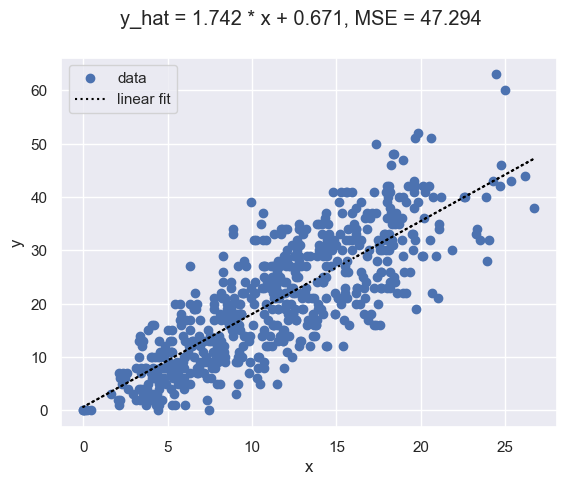

In [40]:
m = line_of_best_fit(mercy_X, mercy_y)
show_fit(mercy_X, mercy_y, m[1], m[0])

This model has an intercept of 0.671 and a slope of 1.742. This means that when Healing Done is 0, we expect a Defensive Assists value of 0.671, and that for every additional unit of Healing Done, we expect there to be an increase of 1.742 units in Defensive Assists.

## Part 3.5: Check Assumptions and Make Recommendations (5 points)

Use plots to check to see if the residuals meet the assumptions for performing a linear regression:
1. independence
2. constant variance/linearity
3. normality

**Note** that you will want to use your `linreg_predict` function, using the **full data set** as your `Xnew` and `ynew` values, to get the residuals for the purposes of this question.

Then, **in a markdown cell**, write 3-4 sentences about whether the model meets the assumptions, what that tells you about the usefulness of the model, and recommendations for next steps (if any).

In [41]:
import scipy.stats as stats
import pylab as py

In [42]:
prediction = linreg_predict(mercy_X, mercy_y, m)
residuals = prediction["resids"]

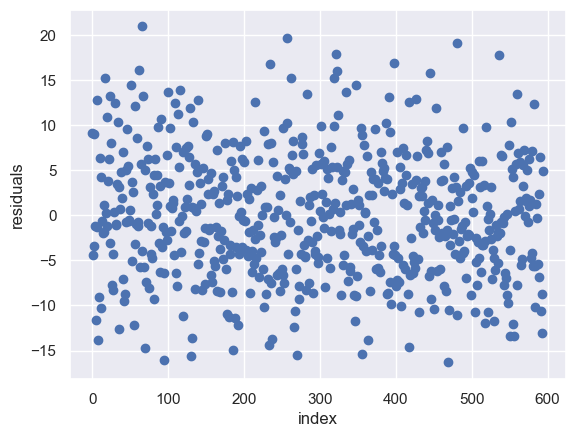

In [44]:
plt.scatter(x = range(len(mercy_y)), y = residuals)
plt.xlabel('index')
plt.ylabel('residuals');

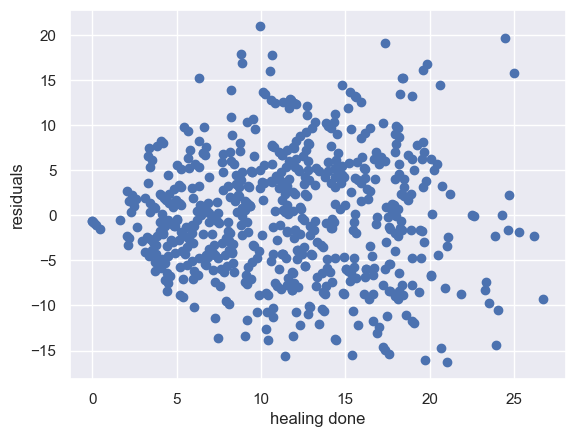

In [46]:
plt.scatter(x = mercy_X, y = residuals)
plt.xlabel('healing done')
plt.ylabel('residuals');

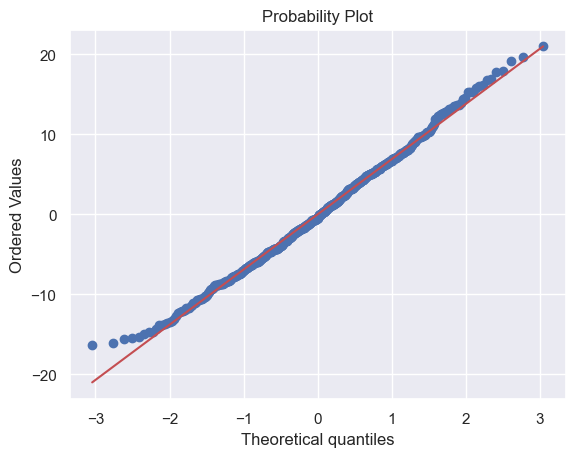

In [47]:
stats.probplot(residuals, dist = "norm", plot = py)
py.show()

Plotting the residuals in order of the observations does not seem to produce any patterns. This suggests that there is no dependency between the observations. The second plot shows that the errors vary constantly across the distribution. In the third plot, we see an approximately straight, 45 degree line which implies that the errors are normally distributed. These three plots show that the model is useful. However, some potential next steps include transforming the y feature in order to fix the variability shown in the constant variance plot.

# Part 4: Fuel Emissions Regression

In this problem you will use the `FuelConsumptionCo2.csv` file (from your Homework Module on Canvas) to build two candidate models to predict a vehicle's Carbon Dioxide Emissions (`CO2EMISSIONS`).

In [48]:
df_fuel = pd.read_csv('FuelConsumptionCo2.csv')
df_fuel.dropna(inplace=True)
df_fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Part 4.1: Multiple Regression (10 points)

Our first model will be a multiple regression model where we try to predict `CO2EMISSIONS` with `ENGINESIZE`, `CYLINDERS` and `FUELCONSUMPTION_COMB_MPG`. Be sure to complete all the following steps:

#### Part 4.1.1

Create your `X` and `y` arrays. Make sure that:

- You scale the $x$ features **using scale normalization**
- You do **not** include a bias column in `X`

Defining the feature list:

    x_feat_list = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']

may help. Your `X` should pass the assert statement in the cell before Part 4.1.2. **Note** if you use a different type of normalization besides scale normalization (i.e. other than simply dividing all features by their corresponding standard deviations) the assert will not pass.

In [50]:
x_feat_list = ["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB_MPG"]

for feat in x_feat_list:
    df_fuel[f"{feat}_scaled"] = df_fuel[feat] / df_fuel[feat].std()

enginesize = np.array(df_fuel.ENGINESIZE_scaled)
cylinders = np.array(df_fuel.CYLINDERS_scaled)
fuelconsumption = np.array(df_fuel.FUELCONSUMPTION_COMB_MPG_scaled)

X = np.column_stack((enginesize, cylinders, fuelconsumption))
y = np.array(df_fuel.CO2EMISSIONS)

In [51]:
# check if 
assert np.isclose(X[0], np.array([1.41531251, 2.19568706, 4.77566865])).all()

#### Part 4.1.2

Using single-fold cross validation with a 70-30 split, create `Xtrain`, `Xtest`, `ytrain`, and `ytest`.

Fit the model using **your own** `line_of_best_fit` function to `Xtrain` and `ytrain`.

Then pass `Xtest`, `ytest`, and the output from the `line_of_best_fit` to your `linreg_predict` function, saving that as something. 

Print out the cross-validated $MSE$ and $R^2$ values. You do not have to comment on their values yet; but you will in Part 4.3 as part of comparing this model with the one from Part 4.2.

In [52]:
crossval = train_test_split(X, y, test_size = 0.3)
Xtrain, Xtest, ytrain, ytest = crossval

In [54]:
m = line_of_best_fit(Xtrain, ytrain)
prediction = linreg_predict(Xtest, ytest, m)

prediction["mse"], prediction["r2"]

(313.80285447459164, 0.9265969352247481)

#### Part 4.1.3

Now fit the full model using your `line_of_best_fit` function, and generate the residuals using your `linreg_predict` function. Create 5 residual plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the residuals
- A plot of `ENGINESIZE` vs. the residuals
- A plot of `CYLINDERS` vs. the residuals
- A plot of `FUELCONSUMPTION_COMB_MPG` vs. the residuals
- A normal probability quantile-quantile plot of the residuals

You do not have to comment on these plots yet; but you will in Part 4.3 as part of comparing this model with the one from Part 4.2.

In [56]:
b = line_of_best_fit(X, y)
prediction = linreg_predict(X, y, b)
residuals = prediction["resids"]

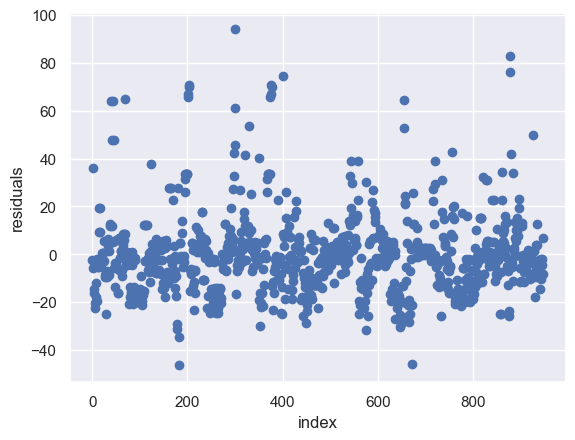

In [57]:
plt.scatter(x = range(len(y)), y = residuals)
plt.xlabel('index')
plt.ylabel('residuals');

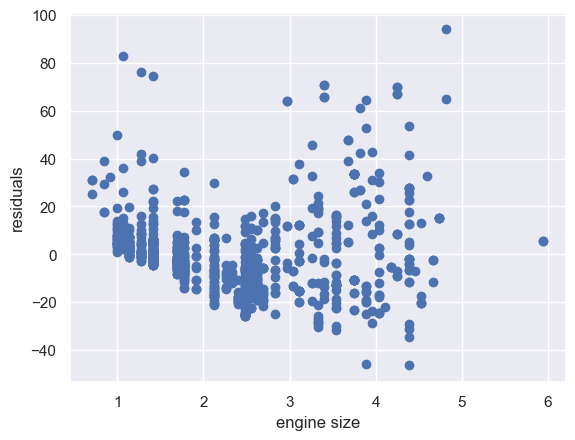

In [58]:
plt.scatter(x = X[:, 0], y = residuals)
plt.xlabel('engine size')
plt.ylabel('residuals');

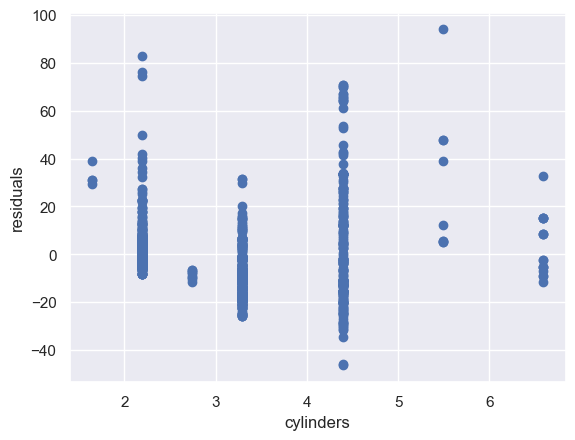

In [59]:
plt.scatter(x = X[:, 1], y = residuals)
plt.xlabel('cylinders')
plt.ylabel('residuals');

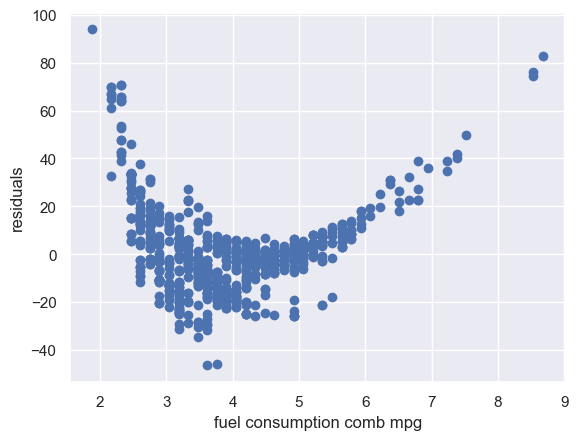

In [60]:
plt.scatter(x = X[:, 2], y = residuals)
plt.xlabel('fuel consumption comb mpg')
plt.ylabel('residuals');

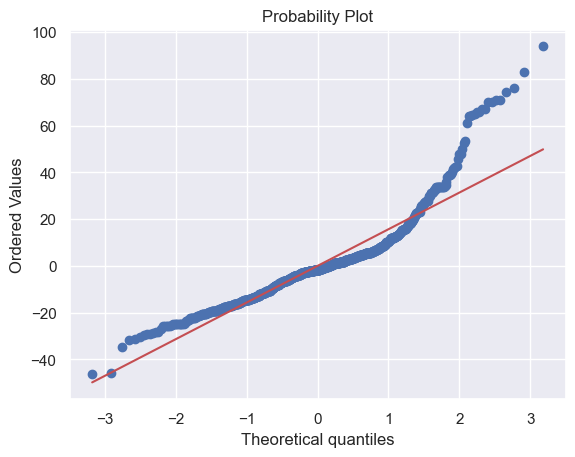

In [61]:
stats.probplot(residuals, dist = "norm", plot = py)
py.show()

## Part 4.2: Polynomial Regression (10 points)

Our second model will be a polynomial regression model where we try to predict `CO2EMISSIONS` with `FUELCONSUMPTION_COMB_MPG`. Be sure to complete all the following steps:

#### Part 4.2.1

Use the `PolynomialFeatures` and `.fit_transform` functions to convert the `FUELCONSUMPTION_COMB_MPG` ($x$) feature into an array (**CALL THIS `X_poly`**) that includes **four** columns corresponding to building a quartic model for `CO2EMISSIONS` ($y$) along the lines of: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4$. I have started the process for you by defining the array containing only our target feature, `X_fuel`.

**Note** that the `.fit_transform` function will produce by default **five** columns, including the bias column. Your functions take arrays that do not have this, so you should remove it.

Your `X_poly` should pass the assert statement in the cell before Part 4.2.2. **Note**: Do *not* scale your features (it is unnecessary, since there is really only one, albeit raised to different powers, and will cause an assert error).

In [62]:
from sklearn.preprocessing import PolynomialFeatures

X_fuel = np.array(df_fuel['FUELCONSUMPTION_COMB_MPG']).reshape(-1,1)

In [70]:
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X_fuel)
X_poly = np.delete(X_poly, 0, 1)

In [71]:
assert np.isclose(X_poly[0], np.array([33, 1089, 35937, 1185921])).all()

#### Part 4.2.2

Using single-fold cross validation with a 70-30 split, create `Xtrain`, `Xtest`, `ytrain`, and `ytest` (from `X_poly` from Part 4.2.1 and `y` as defined before).

Fit the model using **your own** `line_of_best_fit` function to `Xtrain` and `ytrain`.

Then pass `Xtest`, `ytest`, and the output from the `line_of_best_fit` to your `linreg_predict` function, saving that as something. 

Print out the cross-validated $MSE$ and $R^2$ values. You do not have to comment on their values yet; but you will in Part 4.3 as part of comparing this model with the one from Part 4.1.

In [72]:
crossval = train_test_split(X_poly, y, test_size = 0.3)
Xtrain, Xtest, ytrain, ytest = crossval

In [73]:
m = line_of_best_fit(Xtrain, ytrain)
prediction = linreg_predict(Xtest, ytest, m)

prediction["mse"], prediction["r2"]

(11.69697384501514, 0.9970640985611905)

#### Part 4.2.3

Now fit the full model using your `line_of_best_fit` function, and generate the residuals using your `linreg_predict` function. Create 3 residual plots in order to check that the assumptions of independence, constant variance, and normality are met for the model you built:

- A plot of the index vs. the residuals
- A plot of `FUELCONSUMPTION_COMB_MPG` vs. the residuals
- A normal probability quantile-quantile plot of the residuals

You do not have to comment on these plots yet; but you will in Part 4.3 as part of comparing this model with the one from Part 4.1.

In [74]:
b = line_of_best_fit(X_poly, y)
prediction = linreg_predict(X_poly, y, b)
residuals = prediction["resids"]

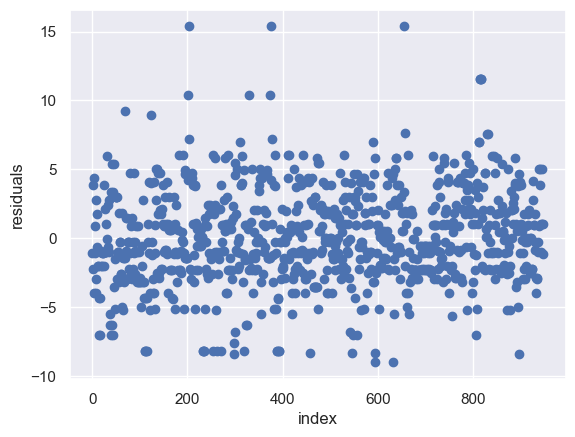

In [75]:
plt.scatter(x = range(len(y)), y = residuals)
plt.xlabel('index')
plt.ylabel('residuals');

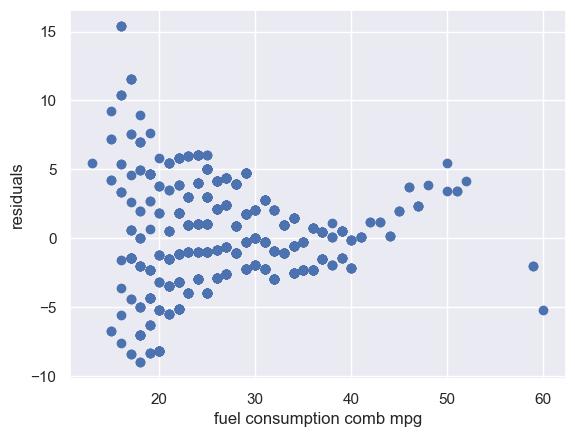

In [77]:
plt.scatter(x = X_fuel, y = residuals)
plt.xlabel('fuel consumption comb mpg')
plt.ylabel('residuals');

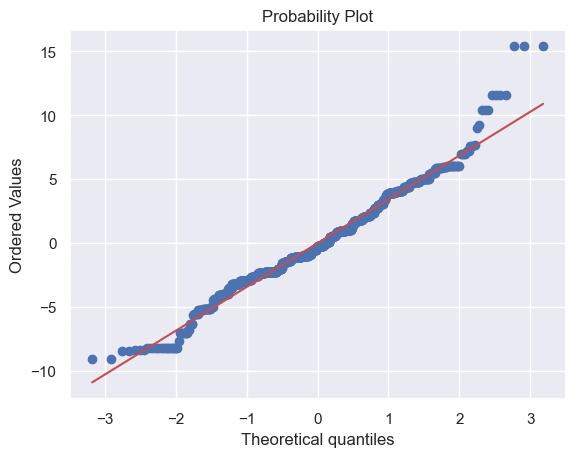

In [78]:
stats.probplot(residuals, dist = "norm", plot = py)
py.show()

## Part 4.3: Conclusions (10 points)

**In a markdown cell**, give a *lengthy and **detailed*** discussion of the two candidate models. Discuss each of their strengths/weaknesses/benefits (i.e. which model had the better $R^2$? which had the better $MSE$? which assumptions were met for each model and which were not?). Then, **make a decision** about which model you would suggest (if you **had** to choose) is most appropriate to use for predicting a vehicle's Carbon Dioxide Emissions. Do you have any thoughts about improving either/both of these models? **Discuss this as well.**

The polynomial regression model had the better r2 score of 0.99 compared to the multiple regression model which had an r2 score of 0.92. Using the polynomial regression model, the x feature of fuel consumption explained 99% of the variation in the y feature, CO2 Emissions. This indicates that this model is particularly strong. This follows with the fact the mean squared error of the polynomial regression was 11.69 while the same measure for the multiple regression was 313.8. This shows that the line of best fit for the polynomial regression comes really close to all of the observations and that there is a lot of variation between the features as shown in the multiple regression model. Looking at the first plot, there does not seem to be any patterns in the residuals versus the index for either of the models, suggesting that there is no dependency between observations. For the constant variance plots, the engine size feature used in the multiple regression model seems to show a bit of curvature. There is a definite funnel shape in the fuel consumption variable in both the multiple and polynomial regression models. This suggests that the variance in these features is non-constant and maybe that the relationship between these variables is not truly linear. In both of the models, the errors seem to be normally distibuted. However, for the multiple regression, the points don't exactly follow a 45 degree line, especially towards the top, more so than in the polynomial regression. If I had to choose between these two models, I would pick the polynomial regression as most appropriate to use for predicting a vehicle's CO2 Emissions. A suggestion for an improvement would be to use leave one out cross validation instead of single fold in order to see if there is a change how accurately the model is able to predict the y feature. We could also adjust the features we are using in the multiple regression to see which ones have the most weight in predicting CO2 Emissions.